<a href="https://colab.research.google.com/github/RamAngothu/DEEP_LEARNING/blob/main/student_scores_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTION OF STUDENT SCORES**

Importing zip file and extraction of zip file

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/student scores linear regression.zip','r')
zip_ref.extractall('/content')
zip_ref.close()
zip_ref.close()

Importing neccessary libraries

In [ ]:
!pip install matplotlib-venn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/student_scores.csv")

In [ ]:
df.shape

(25, 2)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.isnull().sum()

,0
Hours,0
Scores,0


In [ ]:
df.isna().any()

,0
Hours,False
Scores,False


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting graphs

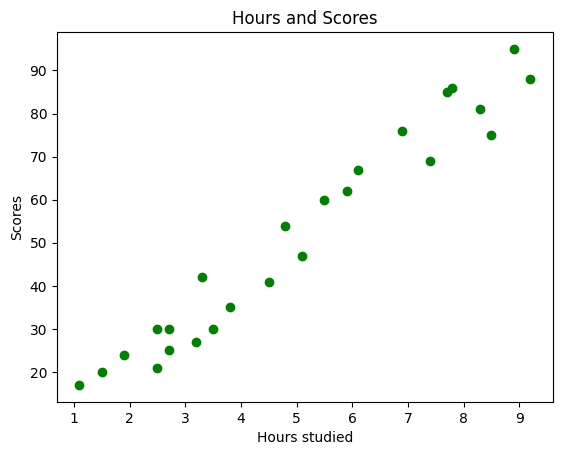

In [ ]:
X = df['Hours'].values
Y = df['Scores'].values

plt.scatter(X,Y,color = 'green')
plt.title("Hours and Scores")
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.show()

Splitting dataset using train_test_split

In [ ]:
X = df['Hours'].values.reshape(-1,1)
Y = df['Scores']
X_train, X_test, Y_train, y_test = train_test_split(
    X, Y, test_size=0.15, random_state=42)


In [ ]:
reg = LinearRegression().fit(X_train,Y_train)

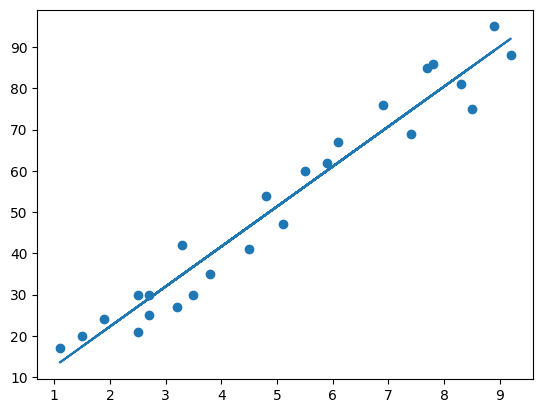

In [ ]:
line = reg.coef_ *X + reg.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()


Prediction

In [ ]:
Y_predict = reg.predict(X_test)
pd.DataFrame({"Actual":y_test,"predicted":Y_predict})

,Actual,predicted
8,81,83.333663
16,30,27.093198
0,21,27.093198
23,76,69.758379


calculating metrics

In [ ]:
MSE = mean_squared_error(y_test,Y_predict)
MAE = mean_absolute_error(y_test,Y_predict)
r2 = r2_score(y_test,Y_predict)

In [ ]:
print(f"mean squared error: {MSE:.2f}%")
print(f"mean absolute error: {MAE:.2f}%")
print(f"r2 score: {r2:.2f}")

mean squared error: 22.50%
mean absolute error: 4.39%
r2 score: 0.97


In [ ]:
hours_studied = int(input("enter number of hours studied: "))

enter number of hours studied: 9


In [ ]:
if(hours_studied<=24):
  student_score = reg.predict(np.array([[hours_studied]]).reshape(-1,1))
  print(f"if a student studies for {hours_studied} hours a day his score will be {round(student_score[0],2)}%")
else:
  print("the entered hours is out of bound")

if a student studies for 9 hours a day his score will be 90.12%
